# 퍼셉트론

다음은 단층 퍼셉트론의 예시이다.

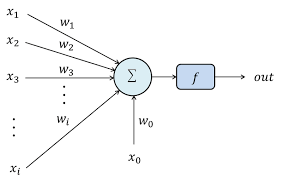

위 퍼셉트론이 동작하는 원리는 먼저 상수항이 추가된 X벡터에 가중치 벡터 W를 내적하는 것으로 퍼셉트론의 동작이 시작된다.

여기서 내적한 값(스칼라)는 부호판별함수(h)에 입력되어 $\hat{y}$값을 반환하게 된다.

여기서 $\hat{y}$는 -1과 1만 출력되며 이 값을 실제 $y$값과 비교해 Loss Function에 입력한다.

최종적으로 이 Loss Function을 미분한 Gradient Vector를 이용해 가중치를 갱신하는 것으로 모델 최적화를 진행한다.

# sklearn 퍼셉트론 구현

- max_iter : 최적화를 위한 반복횟수
- eta0 : 학습속도
- n_iter_no_change : 설정값만큼 반복해도 성능이 나아지지 않으면 max_iter 결정값과 상관없이 중단

In [8]:
from sklearn.datasets import load_iris
from sklearn.linear_model import Perceptron

iris = load_iris()

idx = np.in1d(iris.target, [0, 2])

X = iris.data[idx, :2]
y = (iris.target[idx] / 2).astype(np.int)

In [9]:
def plot_perceptron(n):
    model = Perceptron(max_iter=300, shuffle=False, tol=0, n_iter_no_change=1e9).fit(X, y)
    XX_min = X[:, 0].min() - 1
    XX_max = X[:, 0].max() + 1
    YY_min = X[:, 1].min() - 1
    YY_max = X[:, 1].max() + 1
    XX, YY = np.meshgrid(np.linspace(XX_min, XX_max, 1000),
                        np.linspace(YY_min, YY_max, 1000))
    ZZ = model.predict(np.c_[XX.ravel(), YY.ravel()]).reshape(XX.shape)
    plt.contourf(XX, YY, ZZ, cmap=mpl.cm.Set3)
    plt.scatter(X[y==0, 0], X[y==0, 1], c='w', s=100, marker='o', edgecolors='k')
    plt.scatter(X[y==1, 0], X[y==1, 1], c='k', s=100, marker='x', edgecolors='k')
    plt.xlabel("꽃받침의 길이")
    plt.ylabel("꽃받침의 폭")
    plt.grid(False)
    plt.show()

In [10]:
from ipywidgets import widgets
widgets.interact(plot_perceptron, n=widgets.IntSlider(min=1, max=100, step=1, value=1))

interactive(children=(IntSlider(value=1, description='n', min=1), Output()), _dom_classes=('widget-interact',)…

<function __main__.plot_perceptron(n)>